<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Project 3: Web APIs & NLP

---
## Problem Statement
You are a data scientist in a well known real estate company located in Ames. In a bid to boost sales, the Board of Directors wants to provide free self-served platform to inform clients of the potential value of their homes. They would also like to find identify factors that might affect sale prices as higher sale prices equate to higher commission income. 

You have been tasked by your direct supervisor to create a regression model to predict the price of houses in Ames, so that these prices can be included in the platform. You will also need to identify factors affecting sales price and make recommendations on what could be done to improve sales income.

### Contents:
- [Background](#Background)
- [Datasets Used](#Datasets-Used)
- [Extraction of Data](#Extraction-of-Data)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Data Dictionary](#Data-Dictionary)
- [Pre-processing text data](#Pre-processing-text-data)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Initial Modelling](#Initial-Modelling)
- [Further EDA and Feature Engineering](#Further-EDA-and-Feature-Engineering)
- [Regularisation Regression](#Regularisation-Regression)
- [Model Test Results](#Model-Test-Results)
- [Predicting Sale Prices in Test Dataset](#Predicting-Sale-Prices-in-Test-Dataset)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

Ames is a city in Story County, Iowa, United States, located approximately 30 miles (48 km) north of Des Moines in central Iowa. ([*source*](https://en.wikipedia.org/wiki/Ames,_Iowa)). With a population of more than 65,000, Ames offers cultural, recreational, educational, business, and entertainment amenities more common in bigger metros. As a growing city, Ames continues to focus on building a strong community filled with opportunities for all. ([*source*](https://www.cityofames.org/about-ames))

## Datasets Used

For the purpose of the analysis, we are provided with the `train` and `test` datasets. The `train` dataset contains Ames' housing sales prices and their relevant information from 2006 to 2010. We will be using this dataset for model building purposes. The `test` dataset contains another set of Ames' housing sale price, but does not include the sale prices. We predicting the sale prices found in this dataset instead.

Information found in the `train` datasets includes information suchs as the sale prices, building class, information on the pool, basement, neighbourhood, garage and overall quality of the house. The full information could be found in the data dictionary below.

Information found in the `test` datasets contains the same fields as those found in thte `train` dataset, except for the sale prices.

## Extraction of Data

Please refer to **"1. Extraction of Data"** for the steps done for the extraction of data from Reddit.

## Data Import and Cleaning

**1. Importing of libraries**

In [1]:
# Import libraries
import pandas as pd
import string
import re
import nltk
import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

**2. Importing of datasets being used**

We have imported the `perfumes_df` and `makeup_df` datasets which we have extracted in **"1. Extraction of Data"**.

In [2]:
# Import datasets:
perfumes_df = pd.read_csv("../datasets/perfumes_df.csv")
makeup_df = pd.read_csv("../datasets/makeup_df.csv")

**3.1. Display datasets**

Display the first 5 rows of the imported datasets

In [3]:
# Setting to display all the columns
pd.set_option("display.max_columns", None)

# Display first 5 rows of the datasets
print("First 5 rows of the \"Perfume\" dataset:")
display(perfumes_df.head())
print("")
print("First 5 rows of the \"Makeup\" dataset:")
display(makeup_df.head())

First 5 rows of the "Perfume" dataset:


Unnamed: 0 subreddit                                              title  \
0           0  Perfumes                       Alfred Sung edt + Sung Homme   
1           1  Perfumes            I am looking for a suitable perfume!!!!   
2           2  Perfumes      Talk about bottle designs. Interesting indeed   
3           3  Perfumes                                               Zara   
4           4  Perfumes  Looking for an alternative of Tommy Girl Now, ...   

                                            selftext  
0                                                NaN  
1   DeFacto  Orange Mon Cheri  perfume is no long...  
2                                                NaN  
3               Long lasting Zara perfume for women?  
4                                                NaN


First 5 rows of the "Makeup" dataset:


Unnamed: 0 subreddit                                              title  \
0           0    Makeup                                  Eyeshadow Fallout   
1           1    Makeup  I have got some education on crypto I’ll like ...   
2           2    Makeup  Is Rimmel 1000 Kisses Coffee Bean lip liner di...   
3           3    Makeup                         Eyeshadow Fallout Question   
4           4    Makeup    Make up to cover a tattoo in an extreme climate   

                                            selftext  
0  1. Do any of you experience eyeshadow fallout?...  
1                                          [removed]  
2  Does anyone know a lip liner similar to this c...  
3  My apologies - my last post wasn't very clear ...  
4  Hi, I’m a guy that’s never wore make up before...

The `Unnamed: 0` column is not required as it only contains the index of the dataset. As such, we will drop the column.

In [4]:
# Drop "Unnamed: 0" column from both datasets
perfumes_df.drop('Unnamed: 0', axis = 1, inplace = True)
makeup_df.drop('Unnamed: 0', axis = 1, inplace = True)

# Display first 5 rows of the datasets after dropping column
print("First 5 rows of the \"Perfume\" dataset:")
display(perfumes_df.head())
print("")
print("First 5 rows of the \"Makeup\" dataset:")
display(makeup_df.head())

First 5 rows of the "Perfume" dataset:


subreddit                                              title  \
0  Perfumes                       Alfred Sung edt + Sung Homme   
1  Perfumes            I am looking for a suitable perfume!!!!   
2  Perfumes      Talk about bottle designs. Interesting indeed   
3  Perfumes                                               Zara   
4  Perfumes  Looking for an alternative of Tommy Girl Now, ...   

                                            selftext  
0                                                NaN  
1   DeFacto  Orange Mon Cheri  perfume is no long...  
2                                                NaN  
3               Long lasting Zara perfume for women?  
4                                                NaN


First 5 rows of the "Makeup" dataset:


subreddit                                              title  \
0    Makeup                                  Eyeshadow Fallout   
1    Makeup  I have got some education on crypto I’ll like ...   
2    Makeup  Is Rimmel 1000 Kisses Coffee Bean lip liner di...   
3    Makeup                         Eyeshadow Fallout Question   
4    Makeup    Make up to cover a tattoo in an extreme climate   

                                            selftext  
0  1. Do any of you experience eyeshadow fallout?...  
1                                          [removed]  
2  Does anyone know a lip liner similar to this c...  
3  My apologies - my last post wasn't very clear ...  
4  Hi, I’m a guy that’s never wore make up before...

**3.2. Number of rows and columns in datasets**

Check the number of rows and columns in the datasets.

In [5]:
# Display the number of rows and columns in the datasets
print("\"Perfume\" dataset:")
print(f"(Rows, Column): {perfumes_df.shape}")
print("")
print("\"Makeup\" dataset:")
print(f"(Rows, Column): {makeup_df.shape}")

"Perfume" dataset:
(Rows, Column): (3002, 3)

"Makeup" dataset:
(Rows, Column): (3220, 3)


**4.1. Check datasets for null values**

In [6]:
# Check null values found in both datasets
print('Null values in "Perfume" dataset:')
print(perfumes_df.isnull().sum().to_string())
print("")
print('Null values in "Makeup" dataset:')
print(makeup_df.isnull().sum().to_string())

Null values in "Perfume" dataset:
subreddit       0
title           0
selftext     1452

Null values in "Makeup" dataset:
subreddit      0
title          0
selftext     251


Noted that there are quite a lot of rows that have no selftext. However, there are no null values found in the title. This is because people could already have stated their questions/discussion topic in title and would choose to leave the selftext portion empty instead of repeating them. Thus the title would also contain useful information that we could use in our analysis. As such, we will combine both the title and self text so that we can analysis both sections together.

**4.3. Remove words such as '[removed]' and '[deleted]'**

However, before we combine the two columns, we will need to remove words such as '[removed]' and '[deleted]'. These words just means that the posts have been removed, deleted or that there are no texts included in the body of the posts and thus should not be includded in the analysis.

In [7]:
# Remove the words "[removed]" and "[deleted]" from the selftext column from both datasets
perfumes_df['selftext'] = perfumes_df['selftext'].replace('[removed]',"")
perfumes_df['selftext'] = perfumes_df['selftext'].replace('[deleted]',"")
makeup_df['selftext'] = makeup_df['selftext'].replace('[removed]',"")
makeup_df['selftext'] = makeup_df['selftext'].replace('[deleted]',"")

# Check the datasets to make sure that the words have been removed
print('Perfumes Dataset:')
display(perfumes_df[perfumes_df['selftext']=='[removed]'])
print("")
print('Perfumes Dataset:')
display(perfumes_df[perfumes_df['selftext']=='[deleted]'])
print("")
print('Makeup Dataset:')
display(makeup_df[makeup_df['selftext']=='[removed]'])
print("")
print('Makeup Dataset:')
display(makeup_df[makeup_df['selftext']=='[deleted]'])

Perfumes Dataset:


Empty DataFrame
Columns: [subreddit, title, selftext]
Index: []


Perfumes Dataset:


Empty DataFrame
Columns: [subreddit, title, selftext]
Index: []


Makeup Dataset:


Empty DataFrame
Columns: [subreddit, title, selftext]
Index: []


Makeup Dataset:


Empty DataFrame
Columns: [subreddit, title, selftext]
Index: []

Now that the words have been removed, lets combine the `title` and `selftext` columns.

**4.4. Combine the `title` and `selftext` columns.**

In [8]:
# Drop rows with null values found in the 'selftext' column
perfumes_df['title_and_selftext'] = perfumes_df['title'] + " " + perfumes_df['selftext'].astype(str)
makeup_df['title_and_selftext'] = makeup_df['title'] + " " +makeup_df['selftext'].astype(str)

# Display first 5 rows of the datasets
print("First 5 rows of the \"Perfume\" dataset:")
display(perfumes_df.head())
print("")
print("First 5 rows of the \"Makeup\" dataset:")
display(makeup_df.head())

First 5 rows of the "Perfume" dataset:


subreddit                                              title  \
0  Perfumes                       Alfred Sung edt + Sung Homme   
1  Perfumes            I am looking for a suitable perfume!!!!   
2  Perfumes      Talk about bottle designs. Interesting indeed   
3  Perfumes                                               Zara   
4  Perfumes  Looking for an alternative of Tommy Girl Now, ...   

                                            selftext  \
0                                                NaN   
1   DeFacto  Orange Mon Cheri  perfume is no long...   
2                                                NaN   
3               Long lasting Zara perfume for women?   
4                                                NaN   

                                  title_and_selftext  
0                   Alfred Sung edt + Sung Homme nan  
1  I am looking for a suitable perfume!!!!  DeFac...  
2  Talk about bottle designs. Interesting indeed nan  
3          Zara Long lasting Zara perfume for women?  
4  Looking for an alternative of Tommy Girl Now, ...


First 5 rows of the "Makeup" dataset:


subreddit                                              title  \
0    Makeup                                  Eyeshadow Fallout   
1    Makeup  I have got some education on crypto I’ll like ...   
2    Makeup  Is Rimmel 1000 Kisses Coffee Bean lip liner di...   
3    Makeup                         Eyeshadow Fallout Question   
4    Makeup    Make up to cover a tattoo in an extreme climate   

                                            selftext  \
0  1. Do any of you experience eyeshadow fallout?...   
1                                                      
2  Does anyone know a lip liner similar to this c...   
3  My apologies - my last post wasn't very clear ...   
4  Hi, I’m a guy that’s never wore make up before...   

                                  title_and_selftext  
0  Eyeshadow Fallout 1. Do any of you experience ...  
1  I have got some education on crypto I’ll like ...  
2  Is Rimmel 1000 Kisses Coffee Bean lip liner di...  
3  Eyeshadow Fallout Question My apologies - my l...  
4  Make up to cover a tattoo in an extreme climat...

Now that we have combined the two columns, let us check for null values in the column.

In [9]:
# Check null values in the new combined column
print('Null values in "Perfume" dataset:')
print(perfumes_df.isnull().sum().to_string())
print("\n")
print('Null values in "Makeup" dataset:')
print(makeup_df.isnull().sum().to_string())

Null values in "Perfume" dataset:
subreddit                0
title                    0
selftext              1452
title_and_selftext       0


Null values in "Makeup" dataset:
subreddit               0
title                   0
selftext              251
title_and_selftext      0


There are no null values in the `title_and_selftext` column. However, the word 'nan' is showing up in the `title_and_self` column. NaN actually refers to null cell and this is not a word that we would like to see in our analysis. Thus, we will remove this word from the column as well.

**4.5. Remove "nan" from the `title_and_selftext` column.**

In [10]:
# Remove the word "nan" from the "title_and_selftext" column
perfumes_df['title_and_selftext'] = perfumes_df['title_and_selftext'].str.replace("nan", "")
makeup_df['title_and_selftext'] = makeup_df['title_and_selftext'].str.replace("nan", "")

# Check to make sure that the words have been removed
print("\"Perfume\" dataset:")
display(perfumes_df[perfumes_df['selftext'].isnull()].head())
print("")
print("\"Makeup\" dataset:")
display(makeup_df[makeup_df['selftext'].isnull()].head())

"Perfume" dataset:


subreddit                                              title selftext  \
0  Perfumes                       Alfred Sung edt + Sung Homme      NaN   
2  Perfumes      Talk about bottle designs. Interesting indeed      NaN   
4  Perfumes  Looking for an alternative of Tommy Girl Now, ...      NaN   
5  Perfumes    SORBETTO Parfum Rollerball Fragrance .33 fl oz.      NaN   
7  Perfumes                       Lucky me :) MFK set one sale      NaN   

                                  title_and_selftext  
0                      Alfred Sung edt + Sung Homme   
2     Talk about bottle designs. Interesting indeed   
4  Looking for an alternative of Tommy Girl Now, ...  
5   SORBETTO Parfum Rollerball Fragrance .33 fl oz.   
7                      Lucky me :) MFK set one sale


"Makeup" dataset:


subreddit                                              title selftext  \
63    Makeup  how can i tell if a girl has make-up on her fa...      NaN   
81    Makeup  Is IT cosmetics CC cream silicone or water based?      NaN   
83    Makeup  anyone know if grande lash works on brows too?...      NaN   
95    Makeup  hiiii!! how can i do my makeup to replicate so...      NaN   
96    Makeup  One of the bags underneath my eyes is larger t...      NaN   

                                   title_and_selftext  
63  how can i tell if a girl has make-up on her fa...  
81  Is IT cosmetics CC cream silicone or water bas...  
83  anyone know if grande lash works on brows too?...  
95  hiiii!! how can i do my makeup to replicate so...  
96  One of the bags underneath my eyes is larger t...

Now that all the irrelevant words have been removed, the datasets are really for further processing and analysis!

**5. Merging of datasets**

In [11]:
# Merge the both datasets into one dataset
combined_df = pd.merge(perfumes_df, makeup_df, how = 'outer')

# Check the number of rows and columns in the new dataset
print("\"Combined\" dataset:")
print(f"(Rows, Column): {combined_df.shape}")

"Combined" dataset:
(Rows, Column): (6222, 4)


**6. Exporting of datasets**

In [12]:
# Exporting of merged datasets to csv
perfumes_df.to_csv('../datasets/perfumes_df_cleaned.csv')
makeup_df.to_csv('../datasets/makeup_df_cleaned.csv')
combined_df.to_csv('../datasets/combined_df_cleaned.csv')

## Data Dictionary

<br>**Dataset name: `perfumes_df`**
<br>This dataset contains subreddit posts extracted from the "Perfumes" subreddit. 

| Feature | Type | Dataset | Description |
|:--|:-:|:-:|:--|
|subreddit|string|perfumes_df|The subreddit the posts is extracted from. Provides information on the topic of interest.|
|title|string|perfumes_df|Title of the posts found in the subreddit.|
|selftext|string|perfumes_df|Body of the posts found in the subreddit. Usually gives more insights on the posts.|
|title_and_selftext|string|perfumes_df|Combindation of the title and selftext column.|

<br>**Dataset name: `makeup_df`**
<br>This dataset contains subreddit posts extracted from the "Perfumes" subreddit. 

| Feature | Type | Dataset | Description |
|:--|:-:|:-:|:--|
|subreddit|string|makeup_df|The subreddit the posts is extracted from. Provides information on the topic of interest.|
|title|string|makeup_df|Title of the posts found in the subreddit.|
|selftext|string|makeup_df|Body of the posts found in the subreddit. Usually gives more insights on the posts.|
|title_and_selftext|string|makeup_df|Combindation of the title and selftext column.|

<br>**Dataset name: `combined_df`**
<br>This dataset contains subreddit posts extracted from the "Perfumes" subreddit. 

| Feature | Type | Dataset | Description |
|:--|:-:|:-:|:--|
|subreddit|string|combined_df|The subreddit the posts is extracted from. Provides information on the topic of interest.|
|title|string|combined_df|Title of the posts found in the subreddit.|
|selftext|string|combined_df|Body of the posts found in the subreddit. Usually gives more insights on the posts.|
|title_and_selftext|string|combined_df|Combindation of the title and selftext column.|

## Pre-processing text data

Now we will clean the text data so that we can highlight attributes that we want our ML models to pick up on.

**1. Convert Subreddit Labels to Binary**

First, we will convert the subreddit labels to binary so that the model will be able to pickup the labels.

In [13]:
# Convert subreddit labels to binary
combined_df['label'] = combined_df['subreddit'].map({'Perfumes': 0, 'Makeup': 1})

**2. Remove punctuations**

Remove the punctuations as these are not required in text analysis.

In [14]:
# Define function to remove punctuation
def remove_punct(text):
    # store character only if it is not a punctuation
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

# Remove punctuation from the 'title and selftext' column
combined_df['title_and_selftext_clean'] = combined_df['title_and_selftext'].apply(lambda x: remove_punct(x))

# Display the dataset after the changes
display(combined_df.head())

subreddit                                              title  \
0  Perfumes                       Alfred Sung edt + Sung Homme   
1  Perfumes            I am looking for a suitable perfume!!!!   
2  Perfumes      Talk about bottle designs. Interesting indeed   
3  Perfumes                                               Zara   
4  Perfumes  Looking for an alternative of Tommy Girl Now, ...   

                                            selftext  \
0                                                NaN   
1   DeFacto  Orange Mon Cheri  perfume is no long...   
2                                                NaN   
3               Long lasting Zara perfume for women?   
4                                                NaN   

                                  title_and_selftext  label  \
0                      Alfred Sung edt + Sung Homme       0   
1  I am looking for a suitable perfume!!!!  DeFac...      0   
2     Talk about bottle designs. Interesting indeed       0   
3          Zara Long lasting Zara perfume for women?      0   
4  Looking for an alternative of Tommy Girl Now, ...      0   

                            title_and_selftext_clean  
0                       Alfred Sung edt  Sung Homme   
1  I am looking for a suitable perfume  DeFacto  ...  
2      Talk about bottle designs Interesting indeed   
3           Zara Long lasting Zara perfume for women  
4  Looking for an alternative of Tommy Girl Now P...

**2. Tokenization**

Split the text into smaller pieces.

In [15]:
# Define function to tokenize the column
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

# Tokenize the 'title and selftext' column
combined_df['title_and_selftext_tokenized'] = combined_df['title_and_selftext_clean'].apply(
    lambda x: tokenize(x.lower()))

# Display the dataset after the changes
display(combined_df.head())

subreddit                                              title  \
0  Perfumes                       Alfred Sung edt + Sung Homme   
1  Perfumes            I am looking for a suitable perfume!!!!   
2  Perfumes      Talk about bottle designs. Interesting indeed   
3  Perfumes                                               Zara   
4  Perfumes  Looking for an alternative of Tommy Girl Now, ...   

                                            selftext  \
0                                                NaN   
1   DeFacto  Orange Mon Cheri  perfume is no long...   
2                                                NaN   
3               Long lasting Zara perfume for women?   
4                                                NaN   

                                  title_and_selftext  label  \
0                      Alfred Sung edt + Sung Homme       0   
1  I am looking for a suitable perfume!!!!  DeFac...      0   
2     Talk about bottle designs. Interesting indeed       0   
3          Zara Long lasting Zara perfume for women?      0   
4  Looking for an alternative of Tommy Girl Now, ...      0   

                            title_and_selftext_clean  \
0                       Alfred Sung edt  Sung Homme    
1  I am looking for a suitable perfume  DeFacto  ...   
2      Talk about bottle designs Interesting indeed    
3           Zara Long lasting Zara perfume for women   
4  Looking for an alternative of Tommy Girl Now P...   

                        title_and_selftext_tokenized  
0                 [alfred, sung, edt, sung, homme, ]  
1  [i, am, looking, for, a, suitable, perfume, de...  
2  [talk, about, bottle, designs, interesting, in...  
3   [zara, long, lasting, zara, perfume, for, women]  
4  [looking, for, an, alternative, of, tommy, gir...

**3. Remove stopwords**

Remove the words that have very little meaning as these words are not going to be helpful in our analysis.

In [16]:
# Obtain stopwords from the NLTK(Natural Language Toolkit) in Python
stopword = nltk.corpus.stopwords.words('english')

# Define function to remove stop words
def remove_stopwords(tokenized_list):
    # Store in text only if word is not found in stopword i.e. it is not a stopword
    text = [word for word in tokenized_list if word not in stopword]
    return text

# Remove stopwords from the 'title and selftext' column
combined_df['title_and_selftext_no_stop'] = combined_df['title_and_selftext_tokenized'].apply(
    lambda x: remove_stopwords(x))

# Display the dataset after the changes
display(combined_df.head())

subreddit                                              title  \
0  Perfumes                       Alfred Sung edt + Sung Homme   
1  Perfumes            I am looking for a suitable perfume!!!!   
2  Perfumes      Talk about bottle designs. Interesting indeed   
3  Perfumes                                               Zara   
4  Perfumes  Looking for an alternative of Tommy Girl Now, ...   

                                            selftext  \
0                                                NaN   
1   DeFacto  Orange Mon Cheri  perfume is no long...   
2                                                NaN   
3               Long lasting Zara perfume for women?   
4                                                NaN   

                                  title_and_selftext  label  \
0                      Alfred Sung edt + Sung Homme       0   
1  I am looking for a suitable perfume!!!!  DeFac...      0   
2     Talk about bottle designs. Interesting indeed       0   
3          Zara Long lasting Zara perfume for women?      0   
4  Looking for an alternative of Tommy Girl Now, ...      0   

                            title_and_selftext_clean  \
0                       Alfred Sung edt  Sung Homme    
1  I am looking for a suitable perfume  DeFacto  ...   
2      Talk about bottle designs Interesting indeed    
3           Zara Long lasting Zara perfume for women   
4  Looking for an alternative of Tommy Girl Now P...   

                        title_and_selftext_tokenized  \
0                 [alfred, sung, edt, sung, homme, ]   
1  [i, am, looking, for, a, suitable, perfume, de...   
2  [talk, about, bottle, designs, interesting, in...   
3   [zara, long, lasting, zara, perfume, for, women]   
4  [looking, for, an, alternative, of, tommy, gir...   

                          title_and_selftext_no_stop  
0                 [alfred, sung, edt, sung, homme, ]  
1  [looking, suitable, perfume, defacto, orange, ...  
2     [talk, bottle, designs, interesting, indeed, ]  
3        [zara, long, lasting, zara, perfume, women]  
4  [looking, alternative, tommy, girl, please, su...

**4. Lemmatization**

Convert the words into their most basic forms for analysis.

In [17]:
## Instantiate the function
wn = nltk.WordNetLemmatizer()

# Define function for lemmatization
def lemmatizing(tokenized_text):
    # return list of all lemmatized words for their corresponding words in tokenized_text
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

# Lemmatize the 'title and selftext' column
combined_df['title_and_selftext_lemmatized'] = combined_df['title_and_selftext_no_stop'].apply(
    lambda x: lemmatizing(x))

display(combined_df.head())

subreddit                                              title  \
0  Perfumes                       Alfred Sung edt + Sung Homme   
1  Perfumes            I am looking for a suitable perfume!!!!   
2  Perfumes      Talk about bottle designs. Interesting indeed   
3  Perfumes                                               Zara   
4  Perfumes  Looking for an alternative of Tommy Girl Now, ...   

                                            selftext  \
0                                                NaN   
1   DeFacto  Orange Mon Cheri  perfume is no long...   
2                                                NaN   
3               Long lasting Zara perfume for women?   
4                                                NaN   

                                  title_and_selftext  label  \
0                      Alfred Sung edt + Sung Homme       0   
1  I am looking for a suitable perfume!!!!  DeFac...      0   
2     Talk about bottle designs. Interesting indeed       0   
3          Zara Long lasting Zara perfume for women?      0   
4  Looking for an alternative of Tommy Girl Now, ...      0   

                            title_and_selftext_clean  \
0                       Alfred Sung edt  Sung Homme    
1  I am looking for a suitable perfume  DeFacto  ...   
2      Talk about bottle designs Interesting indeed    
3           Zara Long lasting Zara perfume for women   
4  Looking for an alternative of Tommy Girl Now P...   

                        title_and_selftext_tokenized  \
0                 [alfred, sung, edt, sung, homme, ]   
1  [i, am, looking, for, a, suitable, perfume, de...   
2  [talk, about, bottle, designs, interesting, in...   
3   [zara, long, lasting, zara, perfume, for, women]   
4  [looking, for, an, alternative, of, tommy, gir...   

                          title_and_selftext_no_stop  \
0                 [alfred, sung, edt, sung, homme, ]   
1  [looking, suitable, perfume, defacto, orange, ...   
2     [talk, bottle, designs, interesting, indeed, ]   
3        [zara, long, lasting, zara, perfume, women]   
4  [looking, alternative, tommy, girl, please, su...   

                       title_and_selftext_lemmatized  
0                 [alfred, sung, edt, sung, homme, ]  
1  [looking, suitable, perfume, defacto, orange, ...  
2      [talk, bottle, design, interesting, indeed, ]  
3        [zara, long, lasting, zara, perfume, woman]  
4  [looking, alternative, tommy, girl, please, su...

**5. Count Vectorizer**

Convert text data into a structured, numeric X dataframe by using CountVectorizer.

In [18]:
def countvec_check(value):
    # Create an instance of CountVectorizer and pass in the clean_text function as the analyzer parameter
    count_vect = CountVectorizer(analyzer = lemmatizing)

    # X_counts stores the vectorized version of the data
    X_counts = count_vect.fit_transform(value)

    # Returns the number of rows and columns of X_counts
    print(f'R(Rows, Columns): {X_counts.shape}')

    # Returns the unique words across all text messages
    print(count_vect.get_feature_names())

print(countvec_check(combined_df['title_and_selftext_no_stop']))

R(Rows, Columns): (6222, 15849)
['', '0', '001', '002', '0022', '003', '00s', '01', '010ounce', '011', '012', '013', '015', '02', '020', '029gram', '03', '030', '03w', '04', '043shade', '05', '052', '062', '063', '0647', '069gram', '074', '0746', '075', '075g', '0787', '08338913697kitchen', '095g', '099', '1', '10', '100', '1000', '10000', '100130', '100150', '100150usd', '100200', '100after', '100chinese', '100ml', '100ml33oz', '100th', '100w', '101', '1010', '10100', '1012', '101200midrange', '1015', '1015x', '101contouring', '102', '1020', '1030', '105ml', '1068', '1077', '1079', '1099', '10am', '10b', '10cad', '10day', '10ish', '10k', '10ml', '10oz', '10th', '10x', '10yrs', '11', '110', '1100', '11000', '110s', '111shade', '112', '1120', '115', '116i', '1177', '117g', '118', '1199', '11th', '12', '120', '1200', '120105', '12058', '12085', '120c', '1212', '121oxooctadecyl', '12345', '125', '1250', '126k', '128', '128g', '1295', '1299', '12hexanediol', '12hour', '12ish', '12m', '12mo

From the above, it seems like there were a lot of words with numbers that doesn't really make sense on its own. There are also a lot of non-english words as well. We shall remove them from the analysis.

**6. Remove words with numbers and non-english words**

Remove words with numbers and non-english that doesn't really make sense in this analysis.

In [19]:
# Define function to remove words with numbers
def remove_num(text):
    text = (re.sub('\d+', '', word) for word in text)
    text = [word for word in text if word != '']
    return text

def remove_non_english(text):
    text = [word for word in text if word.isascii() == True]
    return text

# Remove words with numbers from the 'title and selftext' column
combined_df['title_and_selftext_no_stop'] = combined_df['title_and_selftext_no_stop'].apply(
    lambda x: remove_num(x))

# Remove words with non-english words from the 'title and selftext' column
combined_df['title_and_selftext_no_stop'] = combined_df['title_and_selftext_no_stop'].apply(
    lambda x: remove_non_english(x))

# Check the dataset after removing numbers and non-english words
display(combined_df.head())

subreddit                                              title  \
0  Perfumes                       Alfred Sung edt + Sung Homme   
1  Perfumes            I am looking for a suitable perfume!!!!   
2  Perfumes      Talk about bottle designs. Interesting indeed   
3  Perfumes                                               Zara   
4  Perfumes  Looking for an alternative of Tommy Girl Now, ...   

                                            selftext  \
0                                                NaN   
1   DeFacto  Orange Mon Cheri  perfume is no long...   
2                                                NaN   
3               Long lasting Zara perfume for women?   
4                                                NaN   

                                  title_and_selftext  label  \
0                      Alfred Sung edt + Sung Homme       0   
1  I am looking for a suitable perfume!!!!  DeFac...      0   
2     Talk about bottle designs. Interesting indeed       0   
3          Zara Long lasting Zara perfume for women?      0   
4  Looking for an alternative of Tommy Girl Now, ...      0   

                            title_and_selftext_clean  \
0                       Alfred Sung edt  Sung Homme    
1  I am looking for a suitable perfume  DeFacto  ...   
2      Talk about bottle designs Interesting indeed    
3           Zara Long lasting Zara perfume for women   
4  Looking for an alternative of Tommy Girl Now P...   

                        title_and_selftext_tokenized  \
0                 [alfred, sung, edt, sung, homme, ]   
1  [i, am, looking, for, a, suitable, perfume, de...   
2  [talk, about, bottle, designs, interesting, in...   
3   [zara, long, lasting, zara, perfume, for, women]   
4  [looking, for, an, alternative, of, tommy, gir...   

                          title_and_selftext_no_stop  \
0                   [alfred, sung, edt, sung, homme]   
1  [looking, suitable, perfume, defacto, orange, ...   
2       [talk, bottle, designs, interesting, indeed]   
3        [zara, long, lasting, zara, perfume, women]   
4  [looking, alternative, tommy, girl, please, su...   

                       title_and_selftext_lemmatized  
0                 [alfred, sung, edt, sung, homme, ]  
1  [looking, suitable, perfume, defacto, orange, ...  
2      [talk, bottle, design, interesting, indeed, ]  
3        [zara, long, lasting, zara, perfume, woman]  
4  [looking, alternative, tommy, girl, please, su...

In [20]:
# Check the feature names after removing words with numbers
print(countvec_check(combined_df['title_and_selftext_no_stop']))

R(Rows, Columns): (6222, 14824)
['aampa', 'aayaa', 'ab', 'abbott', 'abercrombie', 'abh', 'abhnorvina', 'ability', 'abit', 'able', 'abnormal', 'abnormally', 'abolish', 'abosulte', 'aboutface', 'abouti', 'aboveaverage', 'aboveunder', 'abricot', 'abroad', 'absence', 'absinth', 'absinthe', 'absoloute', 'absolu', 'absolue', 'absolute', 'absolutely', 'absolutley', 'absorb', 'absorbed', 'absorbing', 'absorbmeld', 'absorbs', 'abstract', 'absurd', 'absurdly', 'abt', 'academia', 'academianight', 'academic', 'academy', 'acampora', 'accent', 'accentuate', 'accentuated', 'accentuates', 'accentuating', 'accept', 'acceptable', 'accepted', 'accepting', 'access', 'accessibility', 'accessible', 'accessiblediy', 'accessing', 'accessory', 'accident', 'accidental', 'accidentally', 'accommodate', 'accompanied', 'accomplish', 'accomplishes', 'accord', 'according', 'accordingly', 'account', 'accountant', 'accredited', 'accurate', 'accurately', 'accusation', 'accused', 'accutane', 'ace', 'acetate', 'acetone', 

All the words with numbers and non-english words have now been removed.

In [21]:
def sparsematrix_check(value):
    # Create an instance of CountVectorizer and pass in the clean_text function as the analyzer parameter
    count_vect = CountVectorizer(analyzer = lemmatizing)

    # X_counts stores the vectorized version of the data
    X_counts = count_vect.fit_transform(value)
    
    # Expand sparse matrix to a collection of arrays and then store it in a data frame
    X_counts_df = pd.DataFrame(X_counts.toarray())

    # Apply column name to the dataframe
    X_counts_df.columns = count_vect.get_feature_names()
    
    return X_counts_df

sparsematrix_check(combined_df['title_and_selftext_no_stop'])

aampa  aayaa  ab  abbott  abercrombie  abh  abhnorvina  ability  abit  \
0         0      0   0       0            0    0           0        0     0   
1         0      0   0       0            0    0           0        0     0   
2         0      0   0       0            0    0           0        0     0   
3         0      0   0       0            0    0           0        0     0   
4         0      0   0       0            0    0           0        0     0   
...     ...    ...  ..     ...          ...  ...         ...      ...   ...   
6217      0      0   0       0            0    0           0        0     0   
6218      0      0   0       0            0    0           0        0     0   
6219      0      0   0       0            0    0           0        0     0   
6220      0      0   0       0            0    0           0        0     0   
6221      0      0   0       0            0    1           0        0     0   

      able  abnormal  abnormally  abolish  abosulte  aboutface  abouti  \
0        0         0           0        0         0          0       0   
1        0         0           0        0         0          0       0   
2        0         0           0        0         0          0       0   
3        0         0           0        0         0          0       0   
4        0         0           0        0         0          0       0   
...    ...       ...         ...      ...       ...        ...     ...   
6217     0         0           0        0         0          0       0   
6218     0         0           0        0         0          0       0   
6219     0         0           0        0         0          0       0   
6220     0         0           0        0         0          0       0   
6221     0         0           0        0         0          0       0   

      aboveaverage  aboveunder  abricot  abroad  absence  absinth  absinthe  \
0                0           0        0       0        0        0         0   
1                0           0        0       0        0        0         0   
2                0           0        0       0        0        0         0   
3                0           0        0       0        0        0         0   
4                0           0        0       0        0        0         0   
...            ...         ...      ...     ...      ...      ...       ...   
6217             0           0        0       0        0        0         0   
6218             0           0        0       0        0        0         0   
6219             0           0        0       0        0        0         0   
6220             0           0        0       0        0        0         0   
6221             0           0        0       0        0        0         0   

      absoloute  absolu  absolue  absolute  absolutely  absolutley  absorb  \
0             0       0        0         0           0           0       0   
1             0       0        0         0           0           0       0   
2             0       0        0         0           0           0       0   
3             0       0        0         0           0           0       0   
4             0       0        0         0           0           0       0   
...         ...     ...      ...       ...         ...         ...     ...   
6217          0       0        0         0           0           0       0   
6218          0       0        0         0           0           0       0   
6219          0       0        0         0           0           0       0   
6220          0       0        0         0           0           0       0   
6221          0       0        0         0           0           0       0   

      absorbed  absorbing  absorbmeld  absorbs  abstract  absurd  absurdly  \
0            0          0           0        0         0       0         0   
1            0          0           0        0         0       0         0   
2            0          0           0        0  

Now we have a count matrix with 14,824 unique words. Let's look at the top words found in each subreddit.

**7. Count Vectorizer (N-Grams)**

In [22]:
# Define function for N-Gram lemmatization
def lemmatizing_ngram(tokenized_text):
    # return string of all lemmatized words for their corresponding words in tokenized_text
    text = " ".join([wn.lemmatize(word) for word in tokenized_text])
    return text

# Lemmatize the 'title and selftext' column
combined_df['title_and_selftext_lemmatized'] = combined_df['title_and_selftext_no_stop'].apply(
    lambda x: lemmatizing_ngram(x))

# Define function to create sparsematrix for N-Gram
def sparsematrix_ngram_check(value, num):
    # Create a ngram
    ngram_vect = CountVectorizer(ngram_range=(num,num))

    # X_counts stores the vectorized version of the data
    X_counts = ngram_vect.fit_transform(value)
    
    # Expand sparse matrix to a collection of arrays and then store it in a data frame
    X_counts_df = pd.DataFrame(X_counts.toarray())
    
    # Returns the number of rows and columns of X_counts
    print('Total number of rows and columns:')
    print(f'(Rows, Columns): {X_counts.shape}')

    # Apply column name to the dataframe
    X_counts_df.columns = ngram_vect.get_feature_names()
    
    return X_counts_df

# Save bigram sparse matrix as combined_df_ngram
combined_df_ngram = sparsematrix_ngram_check(combined_df['title_and_selftext_lemmatized'], 2)

Total number of rows and columns:
(Rows, Columns): (6222, 124878)


In [23]:
# Print top 30 BiGram words
print(combined_df_ngram.sum().sort_values(ascending = False).head(30))

smell like           365
anyone know          338
im looking           204
feel like            198
look like            183
perfume smell        176
dont know            142
would like           134
need help            128
please help          122
setting spray        121
really like          120
thanks advance       118
year ago             109
looking something    109
setting powder       107
dry skin             102
hi everyone           97
eye makeup            94
trying find           93
oily skin             93
would love            92
makeup look           92
let know              92
eyeshadow palette     90
wear makeup           87
tom ford              87
looking perfume       87
long lasting          87
lip liner             86
dtype: int64


Now we are ready to do some Exploratory Data Analysis!

## Exploratory Data Analysis

**1. Most Common Words**

Let's find the top 20 words for each subreddit.

**1.1. Most Common Words in Perfumes Subreddit**

In [24]:
# Filter combined_df for "Perfumes"
perfumes_df_cleaned = combined_df[combined_df['subreddit'] == 'Perfumes']

# Filter combined_df for "Makeup"
makeup_df_cleaned = combined_df[combined_df['subreddit'] == 'Makeup']

# Create sparse_matrix for both perfumes and makeup
perfumes_sparse_matrix = sparsematrix_check(perfumes_df_cleaned['title_and_selftext_no_stop'])
makeup_sparse_matrix = sparsematrix_check(makeup_df_cleaned['title_and_selftext_no_stop'])

In [25]:
# Define function to find top words
def top_words(value, num):
    return value.sum().sort_values(ascending = False).head(num)

# Find the top 50 words in perfume subreddit
print('Top 50 words in Perfumes subreddit:')
print("")
print(top_words(perfumes_sparse_matrix, 50).to_string())

Top 50 words in Perfumes subreddit:

perfume           2994
like              1364
scent             1226
smell             1182
fragrance          950
know               682
looking            615
anyone             603
one                577
love               571
im                 502
would              501
find               461
bottle             450
something          450
similar            424
note               421
help               413
good               377
really             370
want               354
get                341
recommendation     316
also               292
new                285
sweet              281
vanilla            279
think              250
year               236
dupe               231
last               227
buy                225
body               225
best               223
time               216
collection         210
discontinued       208
make               207
long               203
much               203
got                199
wear               1

Noted that 'perfume' is the word that is most mentioned in the posts found in the 'Perfume' subreddit. Since, it is directly related to the topic that we are looking at, we will remove this word. Also, there are further stopwords like 'like', 'anyone', 'one', 'im', etc that doesn't really make sense as well. As such, we will remove these words from the `perfumes_df_cleaned` dataset. 

From the top 50 words, we will try to identify and remove as many stop words as possible. After that, we will look at the revised top 20 words to make sure that all of the stopwords have been removed from the list.

**1.2. Remove Further Stopwords from the Perfumes Subreddit**

In [26]:
# Define function to remove stop words
def remove_stopwords(tokenized_list, stopword_list):
    # Store in text only if word is not found in stopword i.e. it is not a stopword
    text = [word for word in tokenized_list if word not in stopword_list]
    return text

# List the words that we want to remove
stopwords_perfume = ['perfume', 'like', 'know', 'looking', 'anyone', 'im', 'would', 'find', 'something', 
                     'similar', 'really', 'want', 'get', 'also', 'new', 'think', 'year', 'dupe', 'one', 'help', 
                     'buy', 'make', 'perfumes', 'got', 'much', 'de', 'good', 'need', 'day', 'hi', 'please', 
                     'thank', 'suggestion', 'could', 'favorite', 'tried']

# Remove stopwords from the 'title and selftext' column
perfumes_df_cleaned['title_and_selftext_no_stop'] = perfumes_df_cleaned['title_and_selftext_no_stop'].apply(
    lambda x: remove_stopwords(x, stopwords_perfume))

# Recreate the sparse matrix for Perfume subreddit
perfumes_sparse_matrix = sparsematrix_check(perfumes_df_cleaned['title_and_selftext_no_stop'])

# Display the new top 20 words after the change
print('Top 20 words in Perfumes subreddit (Revised):')
print("")
print(top_words(perfumes_sparse_matrix, 20).to_string())

Top 20 words in Perfumes subreddit (Revised):

scent             1226
smell             1182
fragrance          950
love               571
bottle             450
note               421
recommendation     316
sweet              281
vanilla            279
last               227
body               225
best               223
time               216
collection         210
discontinued       208
long               203
wear               199
spray              199
floral             195
rose               172


**1.3. Visualise our findings for Perfume Subreddit**

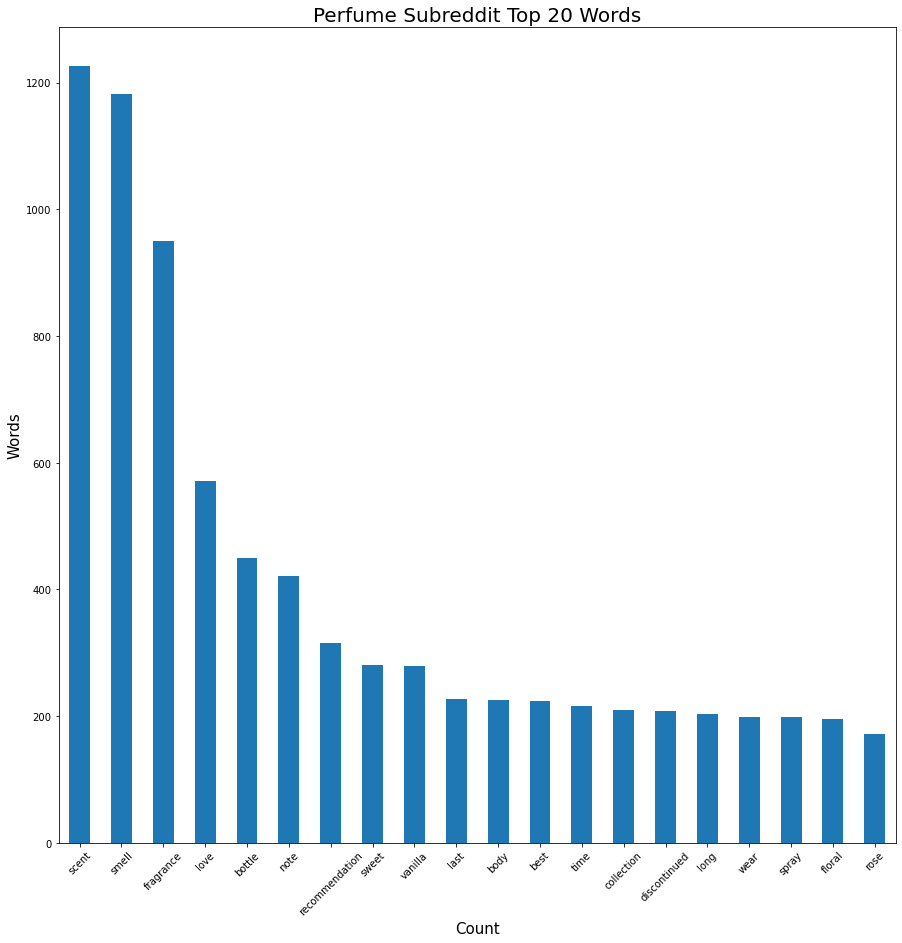

In [27]:
# Convert the top word count to a dataframe
top_words_perfume = top_words(perfumes_sparse_matrix, 20).to_frame()

# Plot the top 20 words in a bar chart
perfume_bar = top_words_perfume.plot(kind = 'bar', figsize = (15,15), fontsize = 10, width = 0.5)

# Set the title
perfume_bar.set_title('Perfume Subreddit Top 20 Words', fontsize=20)

# Remove legend
perfume_bar.get_legend().remove()

# y-axis labels
perfume_bar.set_ylabel('Words', fontsize=15)

# x-axis labels
perfume_bar.set_xlabel('Count', fontsize=15)

# Rotate x labels
plt.xticks(rotation=45);

In [28]:
# Lemmatize the 'title and selftext' column in the perfumes_df_cleaned dataset
perfumes_df_cleaned['title_and_selftext_lemmatized'] = perfumes_df_cleaned['title_and_selftext_no_stop'].apply(
    lambda x: lemmatizing(x))

# Concatenate all the words in the 'title_and_selftext_lemmatized' column to string
perfumes_df_cleaned['title_and_selftext_string'] = perfumes_df_cleaned['title_and_selftext_lemmatized'].apply(lambda x: ' '.join(x))

# Create a mask for the word cloud
perfume_mask = np.array(Image.open('../image/Perfume.png'))

# Generate a word cloud
wc = WordCloud(background_color="white", colormap="tab10", max_font_size=150, mask = perfume_mask)

wcloud = wc.generate(' '.join(perfumes_df_cleaned['title_and_selftext_string']))

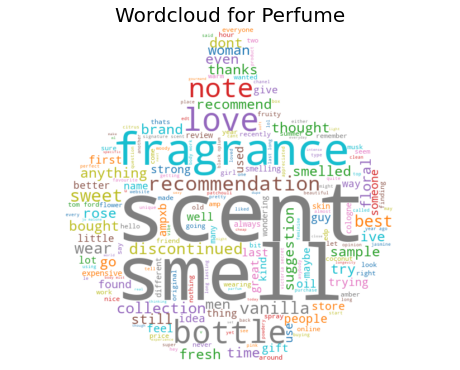

In [29]:
# Make figure to plot
plt.figure(figsize = (8,8))

# plot words
plt.imshow(wcloud, interpolation="bilinear")

# remove axes
plt.title("Wordcloud for Perfume", fontsize = 20)

# remove axes
plt.axis("off")

# show the result
plt.show()

After removing the new stop words, the revised top words seem to make more sense now. The top few words are 'scent' and 'smell', followed by 'fragrance'. Now we perform the same steps for the Makeup subreddit.

**1.4. Most Common Words in Makeup Subreddit**

In [30]:
# Find the top 50 words in makeup subreddit
print('Top 50 words in makeup subreddit')
print(top_words(makeup_sparse_matrix, 50).to_string())

Top 50 words in makeup subreddit
makeup            2289
look              1450
like              1317
foundation        1303
skin              1288
eye               1102
im                 997
use                951
product            935
make               811
know               766
get                763
would              746
help               742
one                729
really             727
good               718
shade              715
anyone             664
looking            650
want               640
face               623
palette            596
lip                574
mascara            561
eyeshadow          555
concealer          551
lash               540
eyeliner           531
wear               512
also               511
need               508
powder             507
color              503
ive                474
tried              460
dont               451
primer             448
find               441
amp                437
recommendation     434
lipstick           420
l

Similarly,'makeup' is the word that is most mentioned in the posts found in the 'Makeup' subreddit. Since, it is also directly related to the topic that we are looking at, we will remove this word. We will also remove further stopwords like 'get', 'would', 'make', etc that doesn't make sense. 

From the top 50 words, we will try to identify and remove as many stop words as possible. After that, we will look at the revised top 20 words to make sure that all of the stopwords have been removed from the list.

**1.5. Remove Further Stopwords from the Makeup Subreddit**

In [31]:
# List the words that we want to remove
stopwords_makeup = ['makeup', 'like', 'im', 'use', 'make', 'know', 'get', 'would', 'help', 'one', 'really',
                    'good', 'anyone', 'looking', 'want', 'face', 'also', 'ive', 'need', 'dont', 'find', 
                    'recommendation']

# Remove stopwords from the 'title and selftext' column
makeup_df_cleaned['title_and_selftext_no_stop'] = makeup_df_cleaned['title_and_selftext_no_stop'].apply(
    lambda x: remove_stopwords(x, stopwords_makeup))

# Recreate the sparse matrix for Makeup subreddit
makeup_sparse_matrix = sparsematrix_check(makeup_df_cleaned['title_and_selftext_no_stop'])

# Display the new top 20 words after the change
print('Top 20 words in Makeup subreddit (Revised):')
print("")
print(top_words(makeup_sparse_matrix, 20).to_string())

Top 20 words in Makeup subreddit (Revised):

look          1450
foundation    1303
skin          1288
eye           1102
product        935
shade          715
palette        596
lip            574
mascara        561
eyeshadow      555
concealer      551
lash           540
eyeliner       531
wear           512
powder         507
color          503
tried          460
primer         448
amp            437
lipstick       420


**1.6. Visualise our findings for Makeup Subreddit**

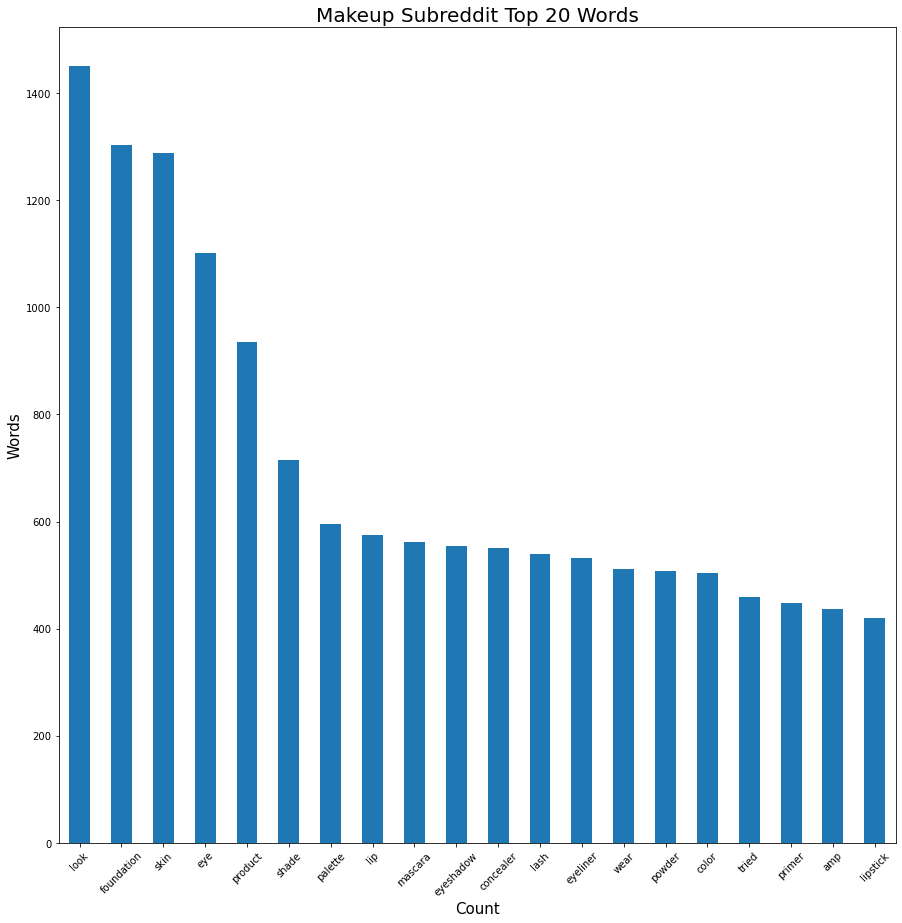

In [32]:
# Convert the top word count to a dataframe
top_words_makeup = top_words(makeup_sparse_matrix, 20).to_frame()

# Plot the top 20 words in a bar chart
makeup_bar = top_words_makeup.plot(kind = 'bar', figsize = (15,15), fontsize = 10, width = 0.5)

# Set the title
makeup_bar.set_title('Makeup Subreddit Top 20 Words', fontsize=20)

# Remove legend
makeup_bar.get_legend().remove()

# y-axis labels
makeup_bar.set_ylabel('Words', fontsize=15)

# x-axis labels
makeup_bar.set_xlabel('Count', fontsize=15)

# Rotate x labels
plt.xticks(rotation=45);

In [33]:
# Lemmatize the 'title and selftext' column in the perfumes_df_cleaned dataset
makeup_df_cleaned['title_and_selftext_lemmatized'] = makeup_df_cleaned['title_and_selftext_no_stop'].apply(
    lambda x: lemmatizing(x))

# Concatenate all the words in the 'title_and_selftext_lemmatized' column to string
makeup_df_cleaned['title_and_selftext_string'] = makeup_df_cleaned['title_and_selftext_lemmatized'].apply(lambda x: ' '.join(x))

# Create a mask for the word cloud
makeup_mask = np.array(Image.open('../image/Lipstick.png'))

# Generate a word cloud
wc = WordCloud(background_color="white", colormap="tab10", max_font_size=150, mask = makeup_mask)

wcloud = wc.generate(' '.join(makeup_df_cleaned['title_and_selftext_string']))

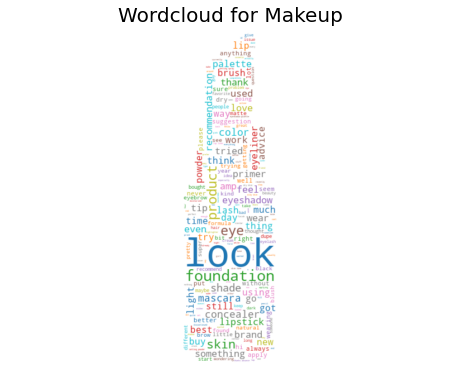

In [34]:
# Make figure to plot
plt.figure(figsize = (8,8))

# plot words
plt.imshow(wcloud, interpolation="bilinear")

# remove axes
plt.title("Wordcloud for Makeup", fontsize = 20)

# remove axes
plt.axis("off")

# show the result
plt.show()

After removing the new stop words, the revised top words make more sense now.. The top few words are 'look' and 'foundation', followed by 'skin'. Now that we have identified the top words, lets look at the top 2 words and 3 words phrases found for each subreddit.

**2. Count Vectorizer (N-Grams)**

In [ ]:
# Define function for N-Gram lemmatization
def lemmatizing_ngram(tokenized_text):
    # return string of all lemmatized words for their corresponding words in tokenized_text
    text = " ".join([wn.lemmatize(word) for word in tokenized_text])
    return text

# Lemmatize the 'title and selftext' column
combined_df['title_and_selftext_lemmatized'] = combined_df['title_and_selftext_no_stop'].apply(
    lambda x: lemmatizing_ngram(x))

# Define function to create sparsematrix for N-Gram
def sparsematrix_ngram_check(value, num):
    # Create a ngram
    ngram_vect = CountVectorizer(ngram_range=(num,num))

    # X_counts stores the vectorized version of the data
    X_counts = ngram_vect.fit_transform(value)
    
    # Expand sparse matrix to a collection of arrays and then store it in a data frame
    X_counts_df = pd.DataFrame(X_counts.toarray())
    
    # Returns the number of rows and columns of X_counts
    print('Total number of rows and columns:')
    print(f'(Rows, Columns): {X_counts.shape}')

    # Apply column name to the dataframe
    X_counts_df.columns = ngram_vect.get_feature_names()
    
    return X_counts_df

# Save bigram sparse matrix as combined_df_ngram
combined_df_ngram = sparsematrix_ngram_check(combined_df['title_and_selftext_lemmatized'], 2)